# Molecular Dynamics of a Macrocycle in Chloroform Demo

### This demo will show you how to use CANDO in order to solvate a macrocycle in a chloroform box and run various simulations with it

<div class="alert alert-block alert-info">
    <strong>Step 1:</b> <strong color='black'>Set up to use the Generalized Amber Force Field (GAFF)</strong></div>

In [1]:
(load-atom-type-rules "ATOMTYPE_GFF.DEF")

#<FORCE-FIELD ATOMTYPE_GFF.DEF>

In [2]:
loadAmberParams "gaff.dat"

#<FORCE-FIELD gaff.dat>

Warning!  Skipping 10-12 hbond in #<IOSTREAM-STREAM #P"/home/avadremann/anaconda3/envs/AmberTools22/dat/leap/parm/gaff.dat">
Warning!  Skipping force field atom equivalences in #<IOSTREAM-STREAM #P"/home/avadremann/anaconda3/envs/AmberTools22/dat/leap/parm/gaff.dat">
Adding force field gaff.dat to DEFAULT


<div class="alert alert-block alert-info">
    <strong>Step 2:</b> <strong color='black'>Load in solvent boxes</strong></div>

In [3]:
source "leaprc.water.tip3p"

T

Adding force field frcmod.tip3p to DEFAULT
Adding force field frcmod.ions1lm_126_tip3p to DEFAULT
Adding force field frcmod.ionsjc_tip3p to DEFAULT
Adding force field frcmod.ions234lm_126_tip3p to DEFAULT


<div class="alert alert-block alert-info">
    <strong>Step 3:</b> <strong color='black'>Sketch the macrocycle in Chemdraw and copy it as a SMILES string</strong></div>

<div class="alert alert-block alert-success">
    </b> <font color='black'>We sketched the macrocycle with the desired stereochemistry and double bond geometry in Chemdraw and copied it as a SMILES string. SMILES is shorthand for Simplified Molecular Input Line Entry System. It is a way to represent chemical structures in a way a computer can use.  </font></div>

In [4]:
cyclo = smiles "O=C1[C@H](C)/C=C(CN(C([C@H](C)/C=C(CN(C([C@H](C)/C=C(CN(C([C@H](C)/C=C(CN1CC2=CC=CC=C2)\\C)=O)CC3=CC=CC=C3)\\C)=O)CC4=CC=CC=C4)\\C)=O)CC5=CC=CC=C5)\\C"

#<AGGREGATE :DEFAULT :id 0 0x31b3a0a7>

<div class="alert alert-block alert-info">
    <strong>Step 4:</b> <strong color='black'>View the sketch. Note that it is a macrocycle and may appear a bit distorted</strong></div>

There were 4 problems for try 2
There were 3 problems for try 3
There were 2 problems for try 4


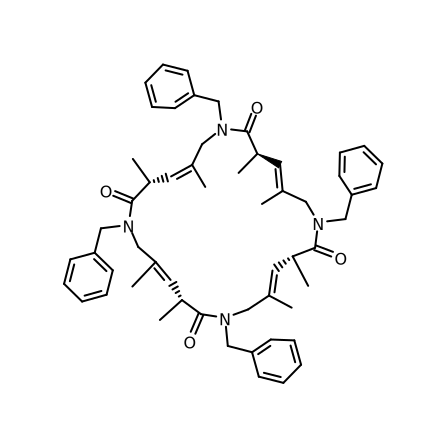

In [5]:
show (sketch2d:sketch2d cyclo)

<div class="alert alert-block alert-info">
    <strong>Step 5:</b> <strong color='black'>Build a starting conformation for the macrocycle</strong></div>

In [6]:
(starting-geometry cyclo) 

Done.


#<DYNAMICS:SIMULATION>

In [7]:
show cyclo

A Jupyter Widget

<div class="alert alert-block alert-info">
    <strong>Step 6:</b> <strong color='black'>Put the macrocycle in a box of chloroform</strong></div>

In [8]:
resolvateBox cyclo CHCL3BOX 12

solvate-box bounding-box -> UNBOUND
tool-solvate-and-shell bounding-box -> UNBOUND
Removing solvent and solute box
Removed 0 solvent molecules
solvent-box = #<CHEM:BOUNDING-BOX 56.496 56.496 56.496>
Total bounding box for atom centers:   31.81  29.50  31.46
There are 1375 solvent molecules and 132 solute atoms
Completed  [**************************************************] ETC: --0.1 seconds


NIL

In [9]:
show cyclo

A Jupyter Widget

<div class="alert alert-block alert-info">
    <strong>Step 7:</b> <strong color='black'>Set up a complex simulation</strong></div>

<div class="alert alert-block alert-info">
    </b> <font color='black'>In this demo we will run a simulation that will follow these steps: 1) Minimize the strain of the macrocycle in the solvent box. 2) Heat the box to 300K. 3) Pressurize the box to 1 atm. 4) Carry out a molecular dynamics simulation</font></div>

In [10]:
sim = (amber:simulation)

#<SIMULATION #jobs 0 NIL>

In [11]:
(amber:add-aggregate sim cyclo)

(#<JUPYTER-JOB START-DEFAULT>)

Setting latest-jobs simulation -> (#<JUPYTER-JOB START-DEFAULT>)


In [12]:
(amber:minimize sim)

#<SIMULATION #jobs 2 (:DEFAULT)>

In [13]:
(amber:heat sim :temperature 300.0)

#<SIMULATION #jobs 3 (:DEFAULT)>

<div class="alert alert-block alert-success">
    </b> <font color='black'>Note that the pressurize command sets the box to 1 atm</font></div>

In [14]:
(amber:pressurize sim)

#<SIMULATION #jobs 4 (:DEFAULT)>

<div class="alert alert-block alert-success">
    </b> <font color='black'>Note that the simulation time can be specified in picoseconds.</font></div>

In [15]:
(amber:dynamics sim :time-ps 100)

#<SIMULATION #jobs 5 (:DEFAULT)>

<div class="alert alert-block alert-info">
    <strong>Step 10:</b> <strong color='black'>Run the simulation</strong></div>

<div class="alert alert-block alert-success">
    </b> <font color='black'> This will write the simulation to the data/cyclo directory and then run it</font></div>

In [16]:
(amber:start-simulation sim :name "data/cyclo/")

Constructing energy function - please wait
Writing to /home/avadremann/cando-demos/data/cyclo/start-DEFAULT.parm
Starting prepare-amber-energy-dihedral
Ordering i1,i2,i3,i4 prepare-amber-energy-dihedral
1-4 interactions prepare-amber-energy-dihedral
Counting w and w/o water prepare-amber-energy-dihedral
Extracting prepare-amber-energy-dihedral
Saving     [*******************************************] ETC: --


NIL

Writing build-file to /home/avadremann/cando-demos/data/cyclo/build.ninja
process.lisp:242 Returning process #S(EXT::EXTERNAL-PROCESS :PID 10445 :INPUT #<IOSTREAM-STREAM "parent-write"> :OUTPUT #<IOSTREAM-STREAM "parent-read"> :ERROR-STREAM #<IOSTREAM-STREAM "parent-error"> :%STATUS :RUNNING :%CODE NIL :%LOCK #<MUTEX "external-process-lock" :owner NIL :counter 0 @0x7f01fb0f0319> :%PIPE #<PROCESS "external-process" @0x7f01ee3bc309 (Not yet started)>)


In [17]:
(amber.jupyter::monitor sim)

A Jupyter Widget

## Display a movie of the trajectory.

In [18]:
traj = (load-amber-topology-trajectory-pair :topology-filename "data/cyclo/start-DEFAULT.parm"
                                            :coordinate-filename "data/cyclo/dynamics-DEFAULT.nc")

#<LEAP.TOPOLOGY:AMBER-TOPOLOGY-TRAJECTORY-PAIR>

### Press play or use the slider.  You may need to rotate the atoms into view.  This is a work in progress.

In [19]:
show traj

A Jupyter Widget

edited by Ava Dremann 07-05-2022, 07-07-2022